In [120]:
# We've come into a well known data science problem. We have an imbalanced data set. Of the roughly 11000 cases we are looking at, 9000 entries are "Suspected Minor
# Injury" or "Possible Injury" and only 750 entries combined from both "Killed" and "Seriously Injured." This will bias our models towards always predicting minor
# injuries. From all of this we really want to be able to predict what make for dangerous road conditions for cyclists. 

# To deal with this, I am going to try oversampling the data with SMOTE.

In [121]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [122]:
data = '/home/wbrave1/Desktop/erdos/Bicycle-Safety/data/NCDOT_BikePedCrash.csv'

BikeCrash = pd.read_csv(data)

features = ['BikeInjury', 'CrashHour', 'CrashDay', 'CrashMonth', 'Weather', 'RdConfig']

BikeCrashTrunc = BikeCrash[features]


In [123]:
MonthMapping = {'January': 1,
                'February': 2,
                'March': 3,
                'April': 4,
                'May': 5,
                'June': 6,
                'July': 7,
                'August': 8,
                'September': 9,
                'October': 10,
                'November': 11,
                'December': 12}

BikeCrashTrunc['CrashMonth'] = BikeCrashTrunc['CrashMonth'].map(MonthMapping)

/tmp/ipykernel_148693/784253329.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BikeCrashTrunc['CrashMonth'] = BikeCrashTrunc['CrashMonth'].map(MonthMapping)


In [124]:
WeekdayMapping = {'Monday': 1,
                  'Tuesday': 2,
                  'Wednesday': 3,
                  'Thursday': 4,
                  'Friday': 5,
                  'Saturday': 6,
                  'Sunday': 7}

BikeCrashTrunc['CrashDay'] = BikeCrashTrunc['CrashDay'].map(WeekdayMapping)

/tmp/ipykernel_148693/2197673485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BikeCrashTrunc['CrashDay'] = BikeCrashTrunc['CrashDay'].map(WeekdayMapping)


In [125]:
BikeCrashTrunc = BikeCrashTrunc.drop(BikeCrashTrunc[BikeCrashTrunc.BikeInjury == 'Unknown Injury'].index)
BikeCrashTrunc = BikeCrashTrunc.drop(BikeCrashTrunc[BikeCrashTrunc.RdConfig == 'Unknown'].index)

In [126]:
# In case you want binary categories

BikeCrashTrunc = BikeCrashTrunc.replace(['O: No Injury', 'B: Suspected Minor Injury', 'C: Possible Injury', 'A: Suspected Serious Injury', 'K: Killed'], ['Minor Injury', 'Minor Injury', 'Minor Injury', 'Serious Injury', 'Serious Injury'])

In [127]:
BikeCrashTrunc = pd.get_dummies(BikeCrashTrunc, columns = ['Weather'], dtype=float)
BikeCrashTrunc = pd.get_dummies(BikeCrashTrunc, columns = ['RdConfig'], dtype=float)

In [128]:
from sklearn.datasets import make_classification

In [129]:
X = BikeCrashTrunc.iloc[:, 1:]
y = BikeCrashTrunc.iloc[:, 0]

In [130]:
oversample = SMOTE(random_state=42)

In [131]:
print('Original X and y shapes: ', X.shape, y.shape)

Original X and y shapes:  (10800, 13) (10800,)


In [132]:
#X_res, y_res = oversample.fit_resample(X, y)

In [133]:
#print('Reshaped X and y:', X_res.shape, y_res.shape)

In [134]:
dtc = DecisionTreeClassifier(max_depth=10)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=216)

In [136]:
X_train_resample, y_train_resample = oversample.fit_resample(X_train, y_train)

In [137]:
dtc.fit(X_train_resample, y_train_resample)

DecisionTreeClassifier(max_depth=10)

In [138]:
y_pred = dtc.predict(X_test)

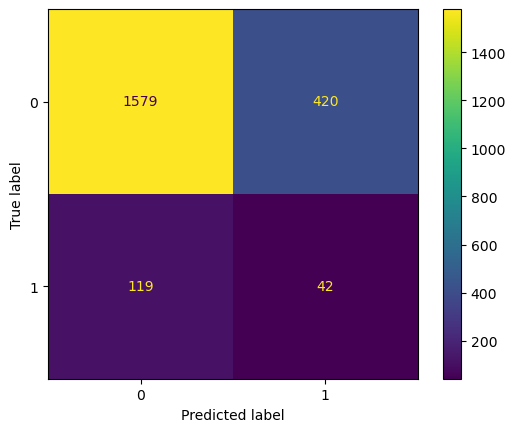

In [139]:
# In case you want binary categories

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=['Minor Injury', 'Serious Injury'])).plot()

# In case you want all 5 categories

#ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=['O: No Injury','B: Suspected Minor Injury','C: Possible Injury','A: Suspected Serious Injury','K: Killed'])).plot()

In [140]:
# In case you want binary categories

print(classification_report(y_test, y_pred, target_names=['Minor Injury', 'Serious Injury']))

# In case you want all 5 categories

#print(classification_report(y_test, y_pred, labels=['O: No Injury','B: Suspected Minor Injury','C: Possible Injury','A: Suspected Serious Injury','K: Killed']))

                precision    recall  f1-score   support

  Minor Injury       0.93      0.79      0.85      1999
Serious Injury       0.09      0.26      0.13       161

      accuracy                           0.75      2160
     macro avg       0.51      0.53      0.49      2160
  weighted avg       0.87      0.75      0.80      2160



In [141]:
pd.DataFrame({'feature_importance_score':dtc.feature_importances_}, index = X.columns).sort_values('feature_importance_score',
                                                ascending=False)

,feature_importance_score
"RdConfig_Two-Way, Not Divided",0.357178
Weather_Clear,0.206656
CrashHour,0.172908
CrashMonth,0.104107
CrashDay,0.084783
"RdConfig_Two-Way, Divided, Unprotected Median",0.026820
Weather_Rain,0.019244
Weather_Cloudy,0.017066
"RdConfig_One-Way, Not Divided",0.008286
Weather_Other,0.002121


In [142]:
train_tree_pred = dtc.predict(X_train)
test_tree_pred = dtc.predict(X_test)

print(f"Test accuracy:", accuracy_score(y_test, test_tree_pred))
print(f"Training accuracy:", accuracy_score(y_train, train_tree_pred))

Test accuracy: 0.750462962962963
Training accuracy: 0.7771990740740741


In [143]:
cv_scores = cross_val_score(dtc, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.91157407 0.91805556 0.91898148 0.91527778 0.91157407]
Mean cross-validation score: 0.9150925925925926
